<a href="https://colab.research.google.com/github/homa-abedin/ML/blob/master/practice%20j1p4%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  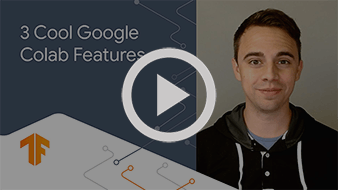
  </a>
</center>

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
train_labels.shape

(60000,)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
train_images.shape

(60000, 28, 28)

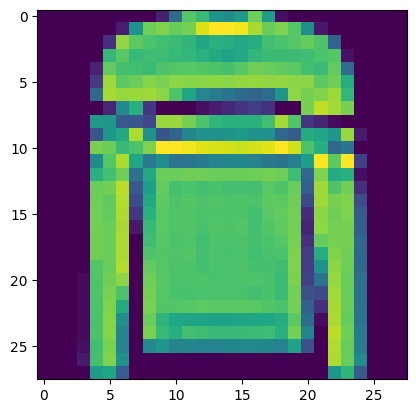

2


In [8]:
plt.imshow(train_images[5])
plt.show()
print(train_labels[5])

In [15]:
X_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in train_images]
X_test_5by_5 = [cv2.resize(img, dsize=(5, 5)) for img in test_images]

In [16]:
X_train = np.reshape(X_train_5by5, [-1,5**2])
X_test = np.reshape(X_test_5by_5, [-1,5**2])

In [20]:
X_train.shape

(60000, 25)

In [21]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
y_train = keras.utils.to_categorical(train_labels, num_classes=X_train.shape[-1])
y_test = keras.utils.to_categorical(test_labels, num_classes=X_test.shape[-1])

In [36]:
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 4s 4ms/step - loss: 1.3194 - accuracy: 0.5359 - val_loss: 0.8132 - val_accuracy: 0.7131
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.8675 - accuracy: 0.6844 - val_loss: 0.7366 - val_accuracy: 0.7297
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7994 - accuracy: 0.7124 - val_loss: 0.7101 - val_accuracy: 0.7383
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7690 - accuracy: 0.7226 - val_loss: 0.6872 - val_accuracy: 0.7459
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7469 - accuracy: 0.7312 - val_loss: 0.6732 - val_accuracy: 0.7505
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7298 - accuracy: 0.7376 - val_loss: 0.6632 - val_accuracy: 0.7539
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7167 - accuracy: 0.7436 - val_loss: 0.6539 - val_accuracy: 0.7609

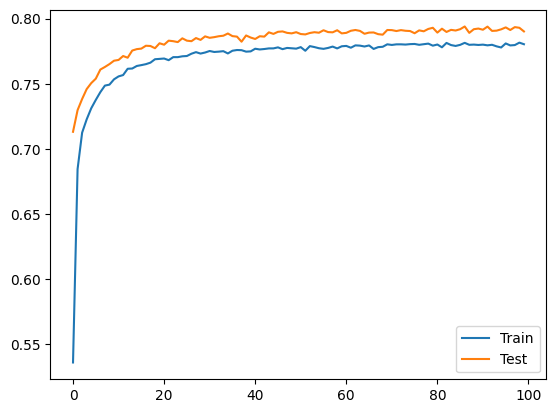

In [40]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()